# **Prediksi Harga Rumah dengan (Keras - ANN)**

**Tujuan**

*  Menganalisis dan memvisualisasikan kumpulan data untuk memprediksi harga rumah di masa mendatang. 
*  Menjelaskan sebagian besar konsep yang digunakan berdasarkan fitur seperti sqft_living, kamar mandi, kamar tidur, pemandangan, dan lainnya.
*  Membuat model ANN yang dapat memprediksi harga rumah di masa mendatang.

**Rumusan Masalah**

*  Fitur apa saja yang tersedia di kumpulan data?
*  Fitur mana yang kategoris
*  Fitur mana yang numerik
*  Fitur mana yang berisi nilai kosong, nol, atau kosong ?
*  Apa tipe data untuk berbagai fitur?
*  Apa distribusi nilai fitur numerik di seluruh sampel?
*  Fitur mana yang lebih berkorelasi dengan harga?

**Dataset**

*  Data ini berisi harga jual rumah untuk King County, yang mencakup Seattle. Ini termasuk rumah yang dijual antara Mei 2014 dan Mei 2015.

*  Data terdiri dari 21 kolom dan 21597 baris.

**Feature Columns**

*  id: ID unik untuk setiap rumah yang terjual
*  date: Tanggal penjualan rumah
*  price: Harga setiap rumah terjual
*  bedrooms: Jumlah kamar tidur
*  bathrooms: Jumlah kamar mandi, di mana 0,5 merupakan kamar dengan toilet tetapi tanpa shower
*  sqft_living: Cuplikan persegi ruang tamu interior apartemen
*  sqft_lot: Cuplikan persegi dari ruang tanah
*  floors: Jumlah lantai
*  water front: Variabel dummy apakah apartemen menghadap ke tepi laut atau tidak
*  view: Indeks dari 0 sampai 4 tentang seberapa baik tampilan properti itu
*  condition: Indeks dari 1 sampai 5 pada kondisi apartemen
*  grade: Indeks dari 1 hingga 13, di mana 1-3 kurang dari konstruksi dan desain bangunan, 7 memiliki tingkat konstruksi dan desain rata-rata, dan 11-13 memiliki tingkat kualitas konstruksi dan desain yang tinggi.
*  sqft_above: Ukuran luas ruang interior perumahan yang berada di atas permukaan tanah
*  sqft_basement: Ukuran luas ruang perumahan interior yang berada di bawah permukaan tanah
*  yr_built: Tahun awal rumah dibangun
*  yr_renovated: Tahun renovasi terakhir rumah
*  zipcode: Di area kode pos mana rumah itu berada
*  lat: Lintang
*  long: Garis bujur
*  sqft_living15: Ukuran luas ruang hunian interior perumahan untuk 15 tetangga terdekat
*  sqft_lot15: Ukuran luas kavling tanah dari 15 tetangga terdekat

**Import Libraries**

In [ ]:
# data analysis dan wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualisasi
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Scaling data dan train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Membuat Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

# Evaluasi pada data pengujian
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix

**Import Dataset**

In [ ]:
url='https://drive.google.com/file/d/1qzQRSmwhJyJwL1Mf745U2BF0B77MpqwD/view?usp=drivesdk'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

In [ ]:
print(df.columns.values)

['id' 'date' 'price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot'
 'floors' 'waterfront' 'view' 'condition' 'grade' 'sqft_above'
 'sqft_basement' 'yr_built' 'yr_renovated' 'zipcode' 'lat' 'long'
 'sqft_living15' 'sqft_lot15']


*  kategori : id, waterfront, zipcode.
*  kontinu: price, bathrooms, floors, lat, long.
*  Diskrit: date, bedrooms, sqft_living, sqft_lot, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, sqft_living15, sqft_lot15.

In [ ]:
#Menampilkan Dataset Teratas
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# Mengecek Missing Value
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Dataset tidak memiliki missing value(bersih) 


In [ ]:
df.info() #melihat informasi pada dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.describe().transpose() #fungsi describe untuk menampilkan deskripsi data secara statistik

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [ ]:
print(df.dtypes) #melihat tipe data tiap variabel

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


Menentukan variabel independen dan dependen

In [ ]:
#Menentukan varibel independen dari data sehingga, menghapus varibel dependen yaitu harga
x = df.drop(["price"],axis = 1)
x.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
#Menampilkan data varibel dependen
y = df["price"]
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

**Exploratory Data Analysis (EDA)**

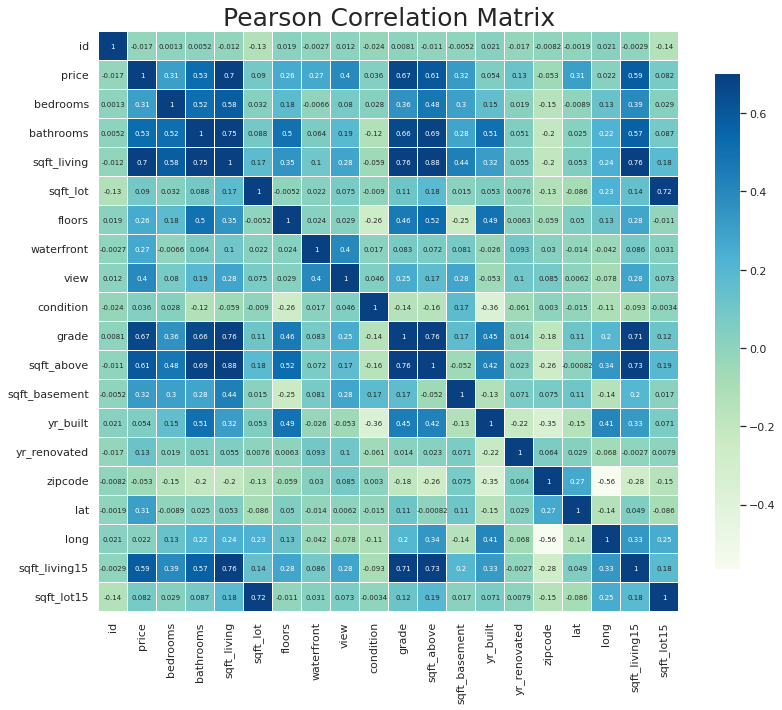

In [ ]:
#Korelasi matriks atau confusion matriks
sns.set(style="whitegrid", font_scale=1)

plt.figure(figsize=(13,13))
plt.title('Pearson Correlation Matrix',fontsize=25)
sns.heatmap(df.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="GnBu",linecolor='w',
            annot=True, annot_kws={"size":7}, cbar_kws={"shrink": .7})

**Korelasi Price**

sqft_living terlihat memiliki korelasi yang tinggi dengan the price, serta grade, sqft_above, sqft_living15 and bathrooms.

In [ ]:
price_corr = df.corr()['price'].sort_values(ascending=False)
print(price_corr)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


**Harga**
*  Sebagian besar harga rumah antara $0 dan \$1.500.000. Harga rumah rata-rata adalah $540.000. 
*  Mungkim kita dapat menghilangkan nilai ekstrem. Misalnya, kita dapat berfokus pada rumah dari $0 hingga \$3.000.000 dan membuang yang lainnya. 
* Sepertinya ada hubungan linier positif antara harga dan sqft_living. 
*  Peningkatan ruang hidup umumnya sesuai dengan kenaikan harga rumah.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


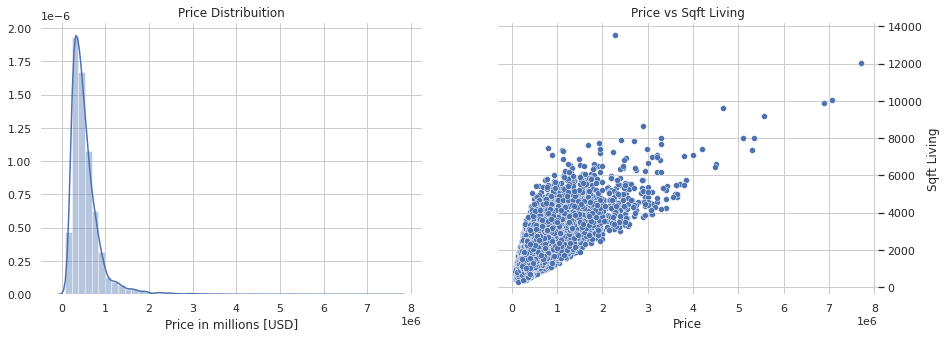

In [ ]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.distplot(df['price'], ax=axes[0])
sns.scatterplot(x='price',y='sqft_living', data=df, ax=axes[1])
sns.despine(bottom=True, left=True)
axes[0].set(xlabel='Price in millions [USD]', ylabel='', title='Price Distribuition')
axes[1].set(xlabel='Price', ylabel='Sqft Living', title='Price vs Sqft Living')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

**Box plot Bedrooms and floors**

*  Ada outlier diplot sebagai poin individu; ini mungkin rumah yang lebih mahal. Kita bisa melihat bahwa harga cenderung naik ketika rumah memiliki lebih banyak kamar tidur.

[Text(0, 0.5, 'Price'),
 Text(0.5, 0, 'Floors'),
 Text(0.5, 1.0, 'Floors vs Price Box Plot')]

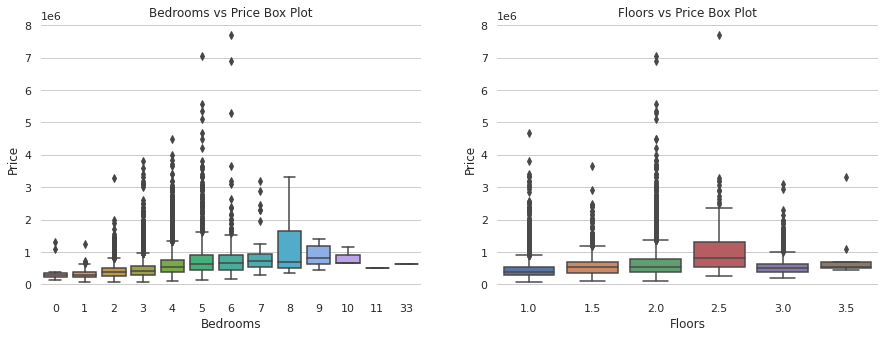

In [ ]:
sns.set(style="whitegrid", font_scale=1)

f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=df['bedrooms'],y=df['price'], ax=axes[0])
sns.boxplot(x=df['floors'],y=df['price'], ax=axes[1])
sns.despine(bottom=True, left=True)
axes[0].set(xlabel='Bedrooms', ylabel='Price', title='Bedrooms vs Price Box Plot')
axes[1].set(xlabel='Floors', ylabel='Price', title='Floors vs Price Box Plot')

**Box plot Waterfront, view and grade**

*  Harga rumah dengan Waterfront cenderung memiliki nilai harga yang lebih baik.
*  Harga rumah dengan waterfront cenderung lebih menyebar dan harga rumah tanpa waterfront cenderung lebih terkonsentrasi.
*  Harga Grade and waterfront. View tampaknya kurang berpengaruh tetapi berpengaruh pada harga.

[Text(0, 0.5, 'Price'),
 Text(0.5, 0, 'Grade'),
 Text(0.5, 1.0, 'Grade vs Price Box Plot')]

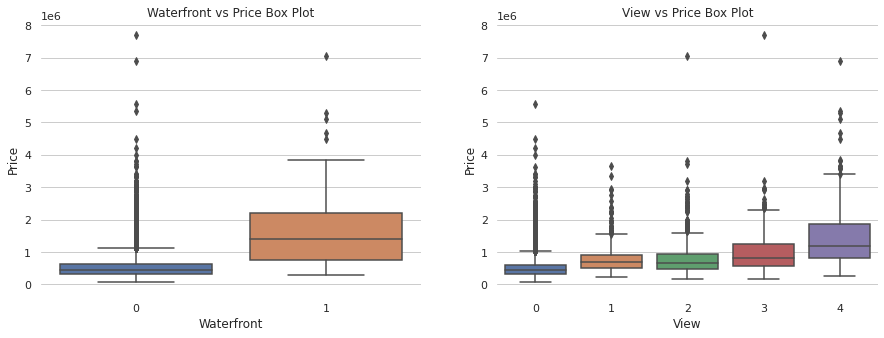

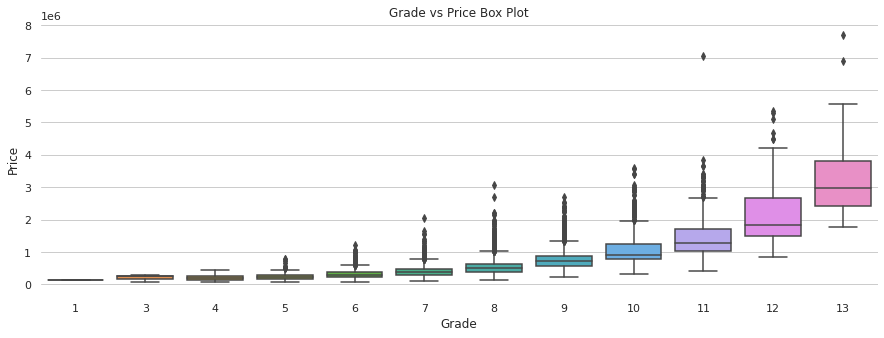

In [ ]:

f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=df['waterfront'],y=df['price'], ax=axes[0])
sns.boxplot(x=df['view'],y=df['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Waterfront', ylabel='Price', title='Waterfront vs Price Box Plot')
axes[1].set(xlabel='View', ylabel='Price', title='View vs Price Box Plot')

f, axe = plt.subplots(1, 1,figsize=(15,5))
sns.boxplot(x=df['grade'],y=df['price'], ax=axe)
sns.despine(left=True, bottom=True)
axe.set(xlabel='Grade', ylabel='Price', title='Grade vs Price Box Plot')

In [ ]:
df = df.drop('id', axis=1)
df = df.drop('zipcode',axis=1)

In [ ]:
df['date'] = pd.to_datetime(df['date'])

df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)

df = df.drop('date',axis=1)

# Check the new columns
print(df.columns.values)

['price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot' 'floors'
 'waterfront' 'view' 'condition' 'grade' 'sqft_above' 'sqft_basement'
 'yr_built' 'yr_renovated' 'lat' 'long' 'sqft_living15' 'sqft_lot15'
 'month' 'year']


**Harga Rumah**

*  Melihat plot artinya tidak ada perbedaan besar antara tahun 2014 dan 2015.
*  Jumlah rumah yang terjual per bulan cenderung sama setiap bulannya.
*  Plot garis menunjukkan bahwa sekitar bulan April terjadi kenaikan harga rumah

[Text(0, 0.5, 'Price'), Text(0.5, 0, 'Month'), Text(0.5, 1.0, 'Price Trends')]

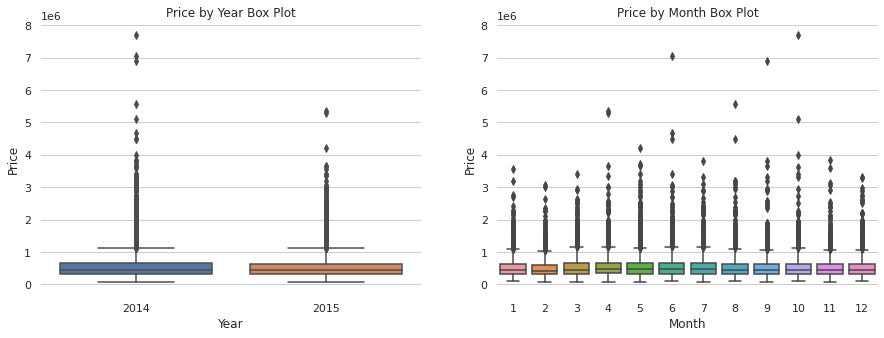

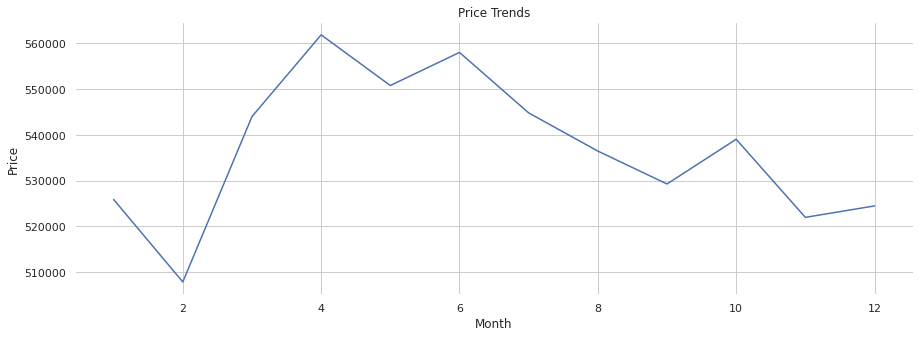

In [ ]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x='year',y='price',data=df, ax=axes[0])
sns.boxplot(x='month',y='price',data=df, ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Year', ylabel='Price', title='Price by Year Box Plot')
axes[1].set(xlabel='Month', ylabel='Price', title='Price by Month Box Plot')

f, axe = plt.subplots(1, 1,figsize=(15,5))
df.groupby('month').mean()['price'].plot()
sns.despine(left=True, bottom=True)
axe.set(xlabel='Month', ylabel='Price', title='Price Trends')

**Scaling dan train test split**

In [ ]:
# Features
X = df.drop('price',axis=1)

# Label
y = df['price']

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

**Normalisasi Data**

In [ ]:
scaler = MinMaxScaler()

# fit and transfrom
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# everything has been scaled between 1 and 0
print('Max: ',X_train.max())
print('Min: ', X_train.min())

Max:  1.0000000000000002
Min:  0.0


**Membuat Pemodelan Data**

In [ ]:
model = Sequential()

# input layer
model.add(Dense(19,activation='relu'))

# hidden layers
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

# output layer
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

**Training model**

In [ ]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 3s 11ms/step - loss: 423617593344.0000 - val_loss: 432969121792.0000
Epoch 2/400
119/119 [==============================] - 1s 7ms/step - loss: 422322274304.0000 - val_loss: 428632539136.0000
Epoch 3/400
119/119 [==============================] - 1s 7ms/step - loss: 406499131392.0000 - val_loss: 392831139840.0000
Epoch 4/400
119/119 [==============================] - 1s 8ms/step - loss: 333988757504.0000 - val_loss: 274706382848.0000
Epoch 5/400
119/119 [==============================] - 1s 7ms/step - loss: 190855315456.0000 - val_loss: 133207703552.0000
Epoch 6/400
119/119 [==============================] - 1s 5ms/step - loss: 105953050624.0000 - val_loss: 104058806272.0000
Epoch 7/400
119/119 [==============================] - 1s 7ms/step - loss: 97962360832.0000 - val_loss: 102308569088.0000
Epoch 8/400
119/119 [==============================] - 1s 5ms/step - loss: 96568778752.0000 - val_loss: 100828397568.0000
Epoch 9/400
119/1

**Training loss per epoch**

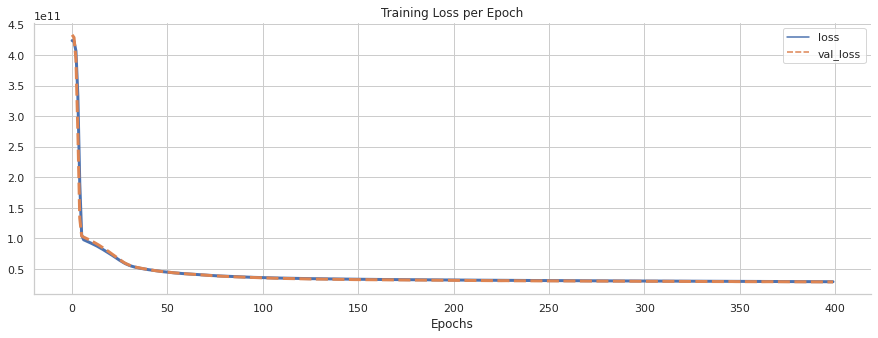

In [ ]:
losses = pd.DataFrame(model.history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

**Evaluasi Pada Data Test**

In [ ]:
# predictions on the test set
predictions = model.predict(X_test)

print('MAE: ',mean_absolute_error(y_test,predictions))
print('MSE: ',mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,predictions)))
print('Variance Regression Score: ',explained_variance_score(y_test,predictions))

print('\n\nDescriptive Statistics:\n',df['price'].describe())

203/203 [==============================] - 0s 1ms/step
MAE:  105029.65978574664
MSE:  28892084152.481087
RMSE:  169976.71650105814
Variance Regression Score:  0.7940451109569042


Descriptive Statistics:
 count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 0, 'Test True Y'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

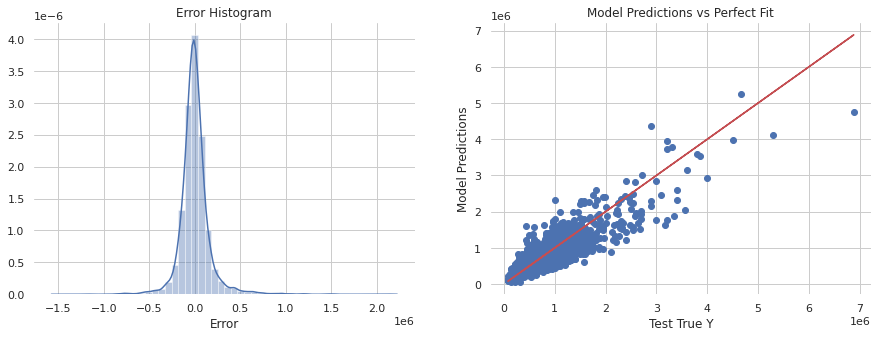

In [ ]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

errors = y_test.values.reshape(6484, 1) - predictions
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

**Prediksi rumah baru**

In [ ]:
# fueatures of new house
single_house = df.drop('price',axis=1).iloc[0]
print(f'Features of new house:\n{single_house}')

# reshape the numpy array and scale the features
single_house = scaler.transform(single_house.values.reshape(-1, 19))

# run the model and get the price prediction
print('\nPrediction Price:',model.predict(single_house)[0,0])

# original price
print('\nOriginal Price:',df.iloc[0]['price'])

Features of new house:
bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
month              10.0000
year             2014.0000
Name: 0, dtype: float64
1/1 [==============================] - 0s 16ms/step

Prediction Price: 284084.4

Original Price: 221900.0


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
